# OU Feature Engineering
#### This notebook is for doing feature engineering for the supervised learning (classification) problem for our capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_data():
    assessments_raw = pd.read_csv("dataset/assessments.csv")
    courses_raw = pd.read_csv("dataset/courses.csv")
    student_assessment_raw = pd.read_csv("dataset/studentAssessment.csv")
    student_info_raw = pd.read_csv("dataset/studentInfo.csv")
    student_registration_raw = pd.read_csv("dataset/studentRegistration.csv")
    # If this is failing, ensure that you have downloaded the dataset and copied studentVle.csv 
    # to the dataset folder.
    student_vle_raw = pd.read_csv("dataset/studentVle.csv") 
    vle_raw = pd.read_csv("dataset/vle.csv")

    return {
        "assessments_raw":assessments_raw,
        "courses_raw":courses_raw,
        "student_assessment_raw":student_assessment_raw,
        "student_info_raw":student_info_raw,
        "student_registration_raw":student_registration_raw,
        "student_vle_raw":student_vle_raw,
        "vle_raw":vle_raw
    }

In [4]:
# this is only used for testing purposes - comment out before saving as a module
#data_dict = get_data()

In [128]:
def did_not_prev_pass(df):
    if len(df['final_result_y']) == 1:
        return False
    zipped = zip(df['code_presentation_y'], df['final_result_y'])
    
    # remove presentations that are at the same time of the current one or after
    curr_presentation = df['code_presentation_x']
    prior_final_results = [x[1] for x in zipped if x[0] < curr_presentation]

    dnp_set = {"Withdrawn", "Fail"}
    if len(dnp_set & set(prior_final_results)) > 0:
        return True
    return False
    
    

# create a column that indicates whether or not the student has previously withdrawn or failed
def add_col_student_prev_failed(student_info_df):
    '''
    Given the student info dataframe, add a column to indicate 
    '''
    si = student_info_df.copy()

    # this is a list of all students final results for each presentation
    si_grouped = si[['id_student','code_module','code_presentation','final_result']].groupby(['id_student']).agg(list).reset_index()
    merged = si.merge(si_grouped, left_on='id_student', right_on='id_student')
    merged['prev_failed_or_withdrawn'] = merged.apply(did_not_prev_pass, axis=1)

    print(si_grouped.columns)
    print(merged.columns)

    si = si.merge(
                merged[['id_student','prev_failed_or_withdrawn', 'code_presentation_x','code_module_x']], 
                left_on=['id_student','code_presentation','code_module'],
                right_on=['id_student','code_presentation_x','code_module_x']
            ).drop(
                columns=['code_presentation_x','code_module_x']
            )
    #si['has_prev_withdrawn_or_failed']
    return si

In [127]:
# test that it doesn't change number of rows, and increases columns by 1
# si_test = si[si.id_student == 8462]
#si_prev_failed = add_student_prev_failed(si)
#print(si_prev_failed.shape)
#print(si.shape)

Index(['id_student', 'code_module', 'code_presentation', 'final_result'], dtype='object')
Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result_x', 'code_module_y', 'code_presentation_y',
       'final_result_y', 'prev_failed_or_withdrawn'],
      dtype='object')
(32593, 13)
(32593, 12)


<AxesSubplot:>

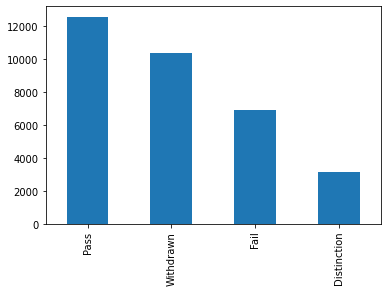

In [103]:

# is the distribution of final_result of the students who have previously failed/withdrawn different from 
# the other students?
# Answer: it appears that they are different from the two plots. Commented out to make this notebook import friendly!

# import matplotlib.pyplot as plt

# si_prev_failed[si_prev_failed.prev_failed == False]['final_result'].value_counts().plot(kind='bar')

<AxesSubplot:>

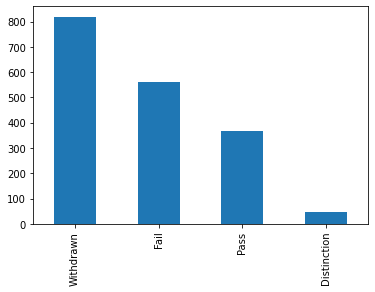

In [104]:
# si_prev_failed[si_prev_failed.prev_failed == True]['final_result'].value_counts().plot(kind='bar')